In [1]:
import sys, os
import pandas as pd


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util.gene import get_gene_bnum
pd.options.display.max_columns = 100

In [2]:
tu_objects_df = pd.read_csv(
    "./data/RegulonDB10/tu_objects_tmp.txt",
    sep="\t",
    comment='#',
    header=None,
)

tu_objects_df.columns = [
    "TRANSCRIPTION_UNIT_ID",
    "NUMTU",
    "TU_POSLEFT",
    "TU_POSRIGHT",
    "TU_TYPE",
    "TU_OBJECT_CLASS",
    "TU_OBJECT_ID",
    "TU_OBJECT_NAME",
    "TU_OBJECT_POSLEFT",
    "TU_OBJECT_POSRIGHT",
    "TU_OBJECT_STRAND",
    "TU_OBJECT_COLORCLASS",
    "TU_OBJECT_DESCRIPTION",
    "TU_OBJECT_SIGMA",
    "TU_OBJECT_EVIDENCE",
    "TU_OBJECT_RI_TYPE",
    "TU_OBJECT_TYPE",
    "EVIDENCE"
]
tu_objects_df.head()

,TRANSCRIPTION_UNIT_ID,NUMTU,TU_POSLEFT,TU_POSRIGHT,TU_TYPE,TU_OBJECT_CLASS,TU_OBJECT_ID,TU_OBJECT_NAME,TU_OBJECT_POSLEFT,TU_OBJECT_POSRIGHT,TU_OBJECT_STRAND,TU_OBJECT_COLORCLASS,TU_OBJECT_DESCRIPTION,TU_OBJECT_SIGMA,TU_OBJECT_EVIDENCE,TU_OBJECT_RI_TYPE,TU_OBJECT_TYPE,EVIDENCE
0,ECK120008913,3,1825955,1832013,H,PM,ECK120009851,astCp1,1832013,1832013,R,NaN,NaN,Sigma70,Human inference of promoter position,NaN,predicted,NaN
1,ECK120008913,3,1825955,1832013,H,GN,ECK120003528,astE,1825955,1826923,R,"51,153,255",amino acids,NaN,NaN,NaN,predicted,NaN
2,ECK120008913,3,1825955,1832013,H,GN,ECK120003529,astB,1826916,1828259,R,"51,153,255",amino acids,NaN,NaN,NaN,predicted,NaN
3,ECK120008913,3,1825955,1832013,H,GN,ECK120003532,astC,1830762,1831982,R,"0,0,255",nitrogen metabolism,NaN,NaN,NaN,predicted,NaN
4,ECK120008913,3,1825955,1832013,H,GN,ECK120003530,astD,1828256,1829734,R,"51,153,255",amino acids,NaN,NaN,NaN,predicted,NaN


In [3]:
gene_synonym_df = pd.read_csv(
    "./data/RegulonDB10/object_synonym.txt",
    sep="\t",
    comment='#',
    header=None,
    quoting=3
)
gene_synonym_df.columns = ["OBJECT_ID", "OBJECT_SYNONYM_NAME", "OS_INTERNAL_COMMENT", "KEY_ID_ORG"]
gene_synonym_df.head()

,OBJECT_ID,OBJECT_SYNONYM_NAME,OS_INTERNAL_COMMENT,KEY_ID_ORG
0,ECK120000001,EG10001,NaN,ECK12
1,ECK120000001,ECK4045,NaN,ECK12
2,ECK120000001,b4053,NaN,ECK12
3,ECK120000001,alr5,NaN,ECK12
4,ECK120000002,b0764,NaN,ECK12


In [4]:
TU_genes_pathways_df = tu_objects_df[tu_objects_df.TU_OBJECT_CLASS=="GN"].copy()
TU_genes_pathways_df["TU_LENGTH"] = TU_genes_pathways_df.apply(lambda r: r["TU_POSRIGHT"] - r["TU_POSLEFT"] + 1, axis=1)
TU_genes_pathways_df["GENE_LEN"] = TU_genes_pathways_df.apply(lambda r: r.TU_OBJECT_POSRIGHT - r.TU_OBJECT_POSLEFT + 1, axis=1)
TU_genes_pathways_df["bnum"] = TU_genes_pathways_df.apply(lambda row: get_gene_bnum(row["TU_OBJECT_ID"], gene_synonym_df) if row["TU_OBJECT_CLASS"] == "GN" else "", axis=1)

# Remove most columns to ensure that dropping duplicates won't be effected by any unnecessary annotations
TU_genes_pathways_df = TU_genes_pathways_df[["TRANSCRIPTION_UNIT_ID", "TU_LENGTH", "GENE_LEN", "bnum",
                          "TU_POSLEFT", "TU_POSRIGHT"]]  # need these for figuring out the length of the genome with unknown TUs below

TU_genes_pathways_df = TU_genes_pathways_df.drop_duplicates()
TU_genes_pathways_df

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,GENE_LEN,bnum,TU_POSLEFT,TU_POSRIGHT
1,ECK120008913,6059,969,b1744,1825955,1832013
2,ECK120008913,6059,1344,b1745,1825955,1832013
3,ECK120008913,6059,1221,b1748,1825955,1832013
4,ECK120008913,6059,1479,b1746,1825955,1832013
5,ECK120008913,6059,1035,b1747,1825955,1832013
...,...,...,...,...,...,...
28522,ECK125257178,551,534,b1045,1105803,1106353
28528,ECK125257179,1313,945,b0076,84000,85312
28535,ECK125257180,1153,312,b1044,1105201,1106353
28536,ECK125257180,1153,534,b1045,1105201,1106353


In [5]:
# tu_objects_df["TU_LENGTH"] = tu_objects_df.apply(lambda row: row["TU_POSRIGHT"] - row["TU_POSLEFT"] + 1, axis=1)
# tu_objects_df.head()

In [6]:
# tu_objects_df["bnum"] = tu_objects_df.apply(lambda row: get_gene_bnum(row["TU_OBJECT_ID"], gene_synonym_df) if row["TU_OBJECT_CLASS"] == "GN" else "", axis=1)
# tu_objects_df.head()

In [7]:
pathway_df = pd.read_csv(
    "./data/pathways/511145.12.PATRIC.pathway.tab",
    sep="\t",
)
pathway_df.head()

,genome_id,genome_name,patric_id,refseq_locus_tag,alt_locus_tag,gene,product,ec_number,ec_description,pathway_id,pathway_name
0,511145.12,Escherichia coli str. K-12 substr. MG1655,fig|511145.12.peg.1,b0002,VBIEscCol129921_0001,thrA,Aspartokinase (EC 2.7.2.4) / Homoserine dehydr...,1.1.1.3,Homoserine dehydrogenase,260,"Glycine, serine and threonine metabolism"
1,511145.12,Escherichia coli str. K-12 substr. MG1655,fig|511145.12.peg.1,b0002,VBIEscCol129921_0001,thrA,Aspartokinase (EC 2.7.2.4) / Homoserine dehydr...,1.1.1.3,Homoserine dehydrogenase,270,Cysteine and methionine metabolism
2,511145.12,Escherichia coli str. K-12 substr. MG1655,fig|511145.12.peg.1,b0002,VBIEscCol129921_0001,thrA,Aspartokinase (EC 2.7.2.4) / Homoserine dehydr...,1.1.1.3,Homoserine dehydrogenase,300,Lysine biosynthesis
3,511145.12,Escherichia coli str. K-12 substr. MG1655,fig|511145.12.peg.1,b0002,VBIEscCol129921_0001,thrA,Aspartokinase (EC 2.7.2.4) / Homoserine dehydr...,2.7.2.4,Aspartate kinase,260,"Glycine, serine and threonine metabolism"
4,511145.12,Escherichia coli str. K-12 substr. MG1655,fig|511145.12.peg.1,b0002,VBIEscCol129921_0001,thrA,Aspartokinase (EC 2.7.2.4) / Homoserine dehydr...,2.7.2.4,Aspartate kinase,270,Cysteine and methionine metabolism


In [8]:
# Has to be a set since a single gene can belong to multiple COGs
def get_pathway_set(bnum):
    pathway_set = set()
    df = pathway_df[pathway_df["refseq_locus_tag"]==bnum]
    for p in df["pathway_name"]:
        pathway_set.add(p)
    return pathway_set


TU_genes_pathways_df["pathway"] = TU_genes_pathways_df.bnum.apply(lambda bnum: get_pathway_set(bnum))
TU_genes_pathways_df

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,GENE_LEN,bnum,TU_POSLEFT,TU_POSRIGHT,pathway
1,ECK120008913,6059,969,b1744,1825955,1832013,{Arginine and proline metabolism}
2,ECK120008913,6059,1344,b1745,1825955,1832013,{Arginine and proline metabolism}
3,ECK120008913,6059,1221,b1748,1825955,1832013,{Arginine and proline metabolism}
4,ECK120008913,6059,1479,b1746,1825955,1832013,{Arginine and proline metabolism}
5,ECK120008913,6059,1035,b1747,1825955,1832013,{Arginine and proline metabolism}
...,...,...,...,...,...,...,...
28522,ECK125257178,551,534,b1045,1105803,1106353,{}
28528,ECK125257179,1313,945,b0076,84000,85312,{}
28535,ECK125257180,1153,312,b1044,1105201,1106353,{}
28536,ECK125257180,1153,534,b1045,1105201,1106353,{}


In [9]:
# def get_pathways_str(bnum):
#     pathways = ""
#     df = pathway_df[pathway_df["refseq_locus_tag"]==bnum]
    
# #     if len(df) > 1:
# #         display(bnum, df)
    
#     if len(df) > 0:
#         for p in df["pathway_name"]:
#             if len(pathways) > 0:
#                 pathways += ";"
#             pathways += p 
#     return pathways

# TU_genes_pathways_df["pathway"] = TU_genes_pathways_df["bnum"].apply(get_pathways_str)
# TU_genes_pathways_df

In [10]:
# TU_genes_pathways_df[TU_genes_pathways_df["pathway"].str.contains(';')]

In [11]:
tu_pathway_df = TU_genes_pathways_df.copy()
tu_pathway_df = tu_pathway_df.drop(['GENE_LEN', "bnum", "pathway"], axis=1)
tu_pathway_df = tu_pathway_df.drop_duplicates()


def get_pathways_from_TU_ID(TU_ID):
    pathway_set = set()
    df = TU_genes_pathways_df[TU_genes_pathways_df.TRANSCRIPTION_UNIT_ID==TU_ID]
    for pathway_set in df["pathway"]:
        pathway_set = pathway_set | pathway_set
    return pathway_set

# Turn sets into string so that can use .str.contains in the following cell
tu_pathway_df["pathway"] = tu_pathway_df.TRANSCRIPTION_UNIT_ID.apply(lambda TU_ID: str(get_pathways_from_TU_ID(TU_ID)))
tu_pathway_df

# If the numbers are the same, then the TUs in the DF are unique
display(len(tu_pathway_df), len(tu_pathway_df.TRANSCRIPTION_UNIT_ID.unique()))

3560

3560

In [12]:
TU_genes_pathways_df

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,GENE_LEN,bnum,TU_POSLEFT,TU_POSRIGHT,pathway
1,ECK120008913,6059,969,b1744,1825955,1832013,{Arginine and proline metabolism}
2,ECK120008913,6059,1344,b1745,1825955,1832013,{Arginine and proline metabolism}
3,ECK120008913,6059,1221,b1748,1825955,1832013,{Arginine and proline metabolism}
4,ECK120008913,6059,1479,b1746,1825955,1832013,{Arginine and proline metabolism}
5,ECK120008913,6059,1035,b1747,1825955,1832013,{Arginine and proline metabolism}
...,...,...,...,...,...,...,...
28522,ECK125257178,551,534,b1045,1105803,1106353,{}
28528,ECK125257179,1313,945,b0076,84000,85312,{}
28535,ECK125257180,1153,312,b1044,1105201,1106353,{}
28536,ECK125257180,1153,534,b1045,1105201,1106353,{}


In [13]:
def get_pathway_length(pathway):
    pathway_length = 0
    specific_pathway_TU_DF = tu_pathway_df[tu_pathway_df["pathway"].str.contains(pathway)]
    pathway_length += specific_pathway_TU_DF.TU_LENGTH.sum()
    
    # substract gene lengths of these TUs that don't belong to this pathway.
    for pathway_TU_ID in specific_pathway_TU_DF.TRANSCRIPTION_UNIT_ID:
        df = TU_genes_pathways_df[TU_genes_pathways_df.TRANSCRIPTION_UNIT_ID==pathway_TU_ID]
        for _, gene in df.iterrows():
            if pathway not in gene['pathway']:
                pathway_length -= gene.GENE_LEN
        
    return pathway_length


# Create blank DF with all pathways.
pathway_len_df = pd.DataFrame(pathway_df["pathway_name"].unique(), columns=["pathway_name"])
pathway_len_df["pathway length"] = pathway_len_df["pathway_name"].apply(get_pathway_length)
pathway_len_df

/home/pphaneuf/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,pathway_name,pathway length
0,"Glycine, serine and threonine metabolism",54804
1,Cysteine and methionine metabolism,36129
2,Lysine biosynthesis,18189
3,Vitamin B6 metabolism,10138
4,Pentose phosphate pathway,51305
...,...,...
123,Zeatin biosynthesis,4086
124,Photosynthesis,20869
125,Linoleic acid metabolism,1023
126,Penicillin and cephalosporin biosynthesis,1221


In [14]:
# Gets the length of each TU that doesn't have an unknown pathway (has a known pathway)

tu_known_pathway_df = tu_pathway_df[tu_pathway_df["pathway"] != "set()"].copy()
tu_known_pathway_df

,TRANSCRIPTION_UNIT_ID,TU_LENGTH,TU_POSLEFT,TU_POSRIGHT,pathway
1,ECK120008913,6059,1825955,1832013,{'Arginine and proline metabolism'}
13,ECK120008914,6373,1825955,1832327,{'Arginine and proline metabolism'}
39,ECK120008915,6085,1825955,1832039,{'Arginine and proline metabolism'}
198,ECK120008926,2142,209679,211820,"{'Tropane, piperidine and pyridine alkaloid bi..."
427,ECK120008938,2586,3880148,3882733,"{'Purine metabolism', 'Pyrimidine metabolism'}"
...,...,...,...,...,...
28294,ECK125203406,1301,208280,209580,"{'Pyruvate metabolism', 'Reductive carboxylate..."
28311,ECK125203408,927,1350251,1351177,{'Fatty acid biosynthesis'}
28350,ECK125230243,935,2964320,2965254,"{'Pyrimidine metabolism', 'One carbon pool by ..."
28466,ECK125257173,4631,909331,913961,{'Pyruvate metabolism'}


In [15]:
# Could be faster
all_TU_pos_set = set()
for _, TU_row in tu_known_pathway_df.iterrows():
    TU_range = set(range(TU_row["TU_POSLEFT"], TU_row["TU_POSRIGHT"] + 1))
    all_TU_pos_set= all_TU_pos_set.union(TU_range)
display(len(all_TU_pos_set))

1103008

In [16]:
unknown_pathway_pos_set = set(range(1 ,4641653 + 1)).difference(all_TU_pos_set)
unknown_pathway_nuc_len = len(unknown_pathway_pos_set)
pathway_len_df = pathway_len_df.set_index("pathway_name")
pathway_len_df.loc["unknown"]=unknown_pathway_nuc_len
pathway_len_df.head()

,pathway length
pathway_name,
"Glycine, serine and threonine metabolism",54804
Cysteine and methionine metabolism,36129
Lysine biosynthesis,18189
Vitamin B6 metabolism,10138
Pentose phosphate pathway,51305


In [17]:
pathway_len_df.to_pickle("./data/pathway_len_df.pkl")

In [18]:
E_COLI_GENOME_LEN = 4641653
unknown_pos_set = set(range(1 ,E_COLI_GENOME_LEN+1)).difference(all_TU_pos_set)
unknown_nuc_len = len(unknown_pos_set)
pathway_genome_cov = 1-(unknown_nuc_len/E_COLI_GENOME_LEN)
print(pathway_genome_cov)

import pickle
with open("./data/pathway_genome_coverage.pkl", 'wb') as f:
    pickle.dump(pathway_genome_cov, f)

0.2376325847709857


(0, 1)

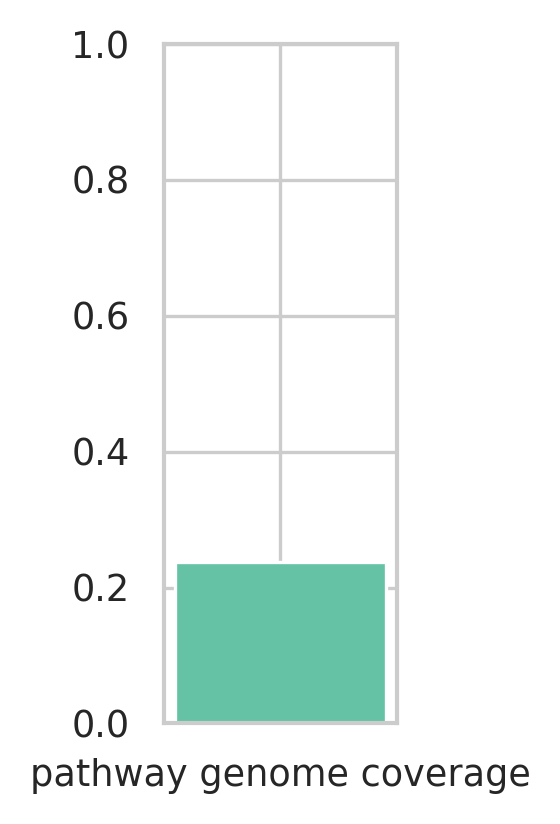

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")


plt.figure(figsize=(1,3))
plt.bar('pathway genome coverage',
        pathway_genome_cov,
        width=[0.1]
       )
plt.ylim(0, 1)